In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [6]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [7]:
#Here we see there are 50000 training images and 1000 test images
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape


(50000, 1)

In [9]:
# it is an two dimensional array
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
 # it is an one dimensional array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1,)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
def plot_sample(X, y, index):
    plt.figure(figsize = (1,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

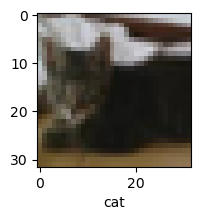

In [15]:
#Let's plot some images to see what they are
plot_sample(X_train, y_train, 9)
 

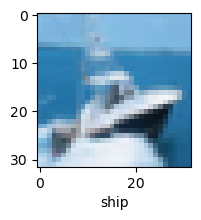

In [16]:
plot_sample(X_train, y_train, 8)

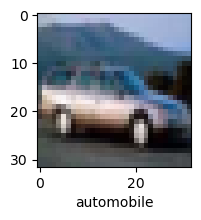

In [17]:
plot_sample(X_train, y_train, 4)

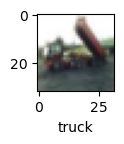

In [22]:
# In this image we change the size
plot_sample(X_train, y_train, 2)

In [24]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
# Now let us build a convolutional neural network to train our images

In [28]:
# convolutional layer are detect features of images
# pooling layers 

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4770 - accuracy: 0.4665
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1098 - accuracy: 0.6127
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9815 - accuracy: 0.6591
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9035 - accuracy: 0.6869
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8419 - accuracy: 0.7085
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7863 - accuracy: 0.7269
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7452 - accuracy: 0.7431
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7010 - accuracy: 0.7580
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6648 - accuracy: 0.7692
Epoch 10/10
1563/1563 [==============================] - 21s 13m

In [31]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9479 - accuracy: 0.6870


[0.9478514790534973, 0.6869999766349792]

In [32]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[3.57463316e-04, 1.24579994e-03, 5.44257509e-03, 7.52515376e-01,
        2.34994804e-04, 9.28400904e-02, 6.47374755e-03, 4.50583684e-05,
        1.39143080e-01, 1.70179771e-03],
       [1.40786264e-02, 9.37538221e-02, 3.14106932e-04, 4.66196661e-06,
        4.33060359e-06, 6.72732767e-07, 6.44880913e-08, 8.06216008e-07,
        8.83596957e-01, 8.24601017e-03],
       [3.39854578e-03, 1.65013626e-01, 3.47732729e-03, 5.61306113e-03,
        3.13627836e-03, 1.23089168e-03, 7.18533120e-04, 2.21430580e-03,
        8.06615591e-01, 8.58185068e-03],
       [7.20800579e-01, 3.41710029e-03, 1.64437369e-02, 1.98525959e-03,
        9.30887014e-02, 4.52956956e-05, 7.15496542e-04, 3.25711444e-04,
        1.63032845e-01, 1.45365266e-04],
       [2.01308580e-07, 9.08946913e-06, 3.35204192e-02, 1.53372595e-02,
        3.95264447e-01, 7.67090416e-04, 5.55087686e-01, 1.44133594e-06,
        1.22469983e-05, 1.14166539e-07]], dtype=float32)

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [34]:

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

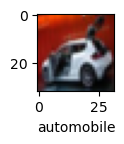

In [35]:
plot_sample(X_test, y_test,6)

In [36]:

classes[y_classes[6]]

'automobile'